# Домашнее задание (10 баллов)


(2 балла)
1. закончить реализацию `ClassificationDecisionTree` в decision_tree
    
    1. реализовать feature_importance_ (для этого метода теста нет, подойдет реализацию любого варианта, базовый способ - рекурсивно суммировать по всем `self.feature_id` `self.q_value_max` и вывести суммы.)
    
    2. проверить корректность predict 
2. реализовать `BaseSampler`, `ObjectSampler` и `FeatureSampler`. `BaseSampler` - базовый класс, у которого должен быть реализован метода `sample_indices` - вернуть индексы сэмплов. `ObjectSampler` сэплирует объекты, `FeatureSampler` - признаки.
3. реализовать `RandomForestClassifier` в random_forest (predict/predict_proba).

Обратите внимение, что в random_forest в качестве `base_estimator` предполагается использовать `DecisionTreeClassifier` из sklearn, использовать вашу реализацию решающего дерева необязательно. <br> Пример запуска тестов 
- `python -m unittest discover sem_dt_rf/decision_tree/tests`
- `python -m unittest discover sem_dt_rf/random_forest/tests` 

Или через `pytest`
- `python -m pytest sem_dt_rf/decision_tree/tests/test_criterio.py`

In [37]:
!python -m unittest discover random_forest/tests

........
----------------------------------------------------------------------
Ran 8 tests in 0.020s

OK


In [38]:
!python -m unittest discover decision_tree/tests

...........
----------------------------------------------------------------------
Ran 11 tests in 0.131s

OK


(1 балл) Для регрессионного дерева необходимо использовать такой критерий:
$$H(R) = \min_c \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2$$

 Докажите, что минимум H(R) достигается при $c$:

$$ c = \frac{1}{|R|} \sum_{(x_j, y_j) \in R} y_j$$

Доказательство: 

$$ J(c) = \frac{1}{|R|} \sum_{(x_i, y_i) \in R} (y_i - c)^2 -> min$$

$$ J'(c) = \frac{1}{|R|} \sum_{(x_i, y_i) \in R} 2(y_i - c)(-1) = 0$$

$$\sum_{(x_i, y_i) \in R} (y_i - c) = 0$$

$$\sum_{(x_i, y_i) \in R} y_i - \sum_{(x_i, y_i) \in R} c = 0$$

$$\sum_{(x_i, y_i) \in R} y_i = c |R|$$

$$\frac{1}{|R|}\sum_{(x_i, y_i) \in R} y_i = c$$

(3 балла) Реализуйте регрессионное дерево. В качестве критерия необходимо использовать критерий, определённый в пункте 2, в коде есть заглушка `MSECriterion`. В качестве `predict` необходимо использовать среднее значение ответов по всем объектам в листе. В коде нет готовой заглушки, реализуйте по аналогии с `class ClassificationDecisionTree(DecisionTree):`.

 Сгенерируйте однопризнаковую выборку для тестирования дерева и покажите работу дерева на этой выборке (пример см. ниже, можно использовать свою версию). Отобразите на одном графике `predict` алгоритма и значение признака. Что меняется при изменении параметра глубины? Сделайте выводы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# generate example
x_shape = 300
x = np.arange(x_shape) / 100
y = x**3 * np.sin(x**3) + np.random.random(x_shape)

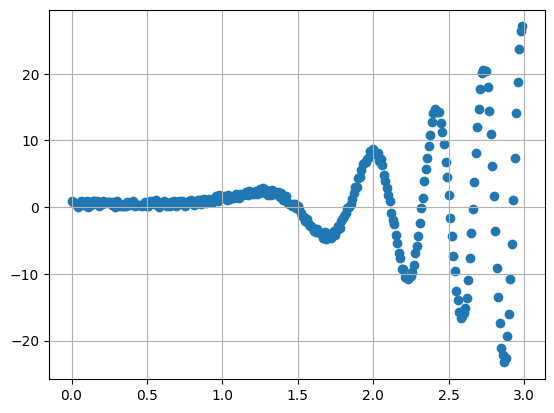

In [41]:
plt.scatter(x, y)
plt.grid()
plt.show()

c:\Users\Лиана\OneDrive\Desktop\MSU\Machine-learning-1\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Лиана\OneDrive\Desktop\MSU\Machine-learning-1\.venv\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


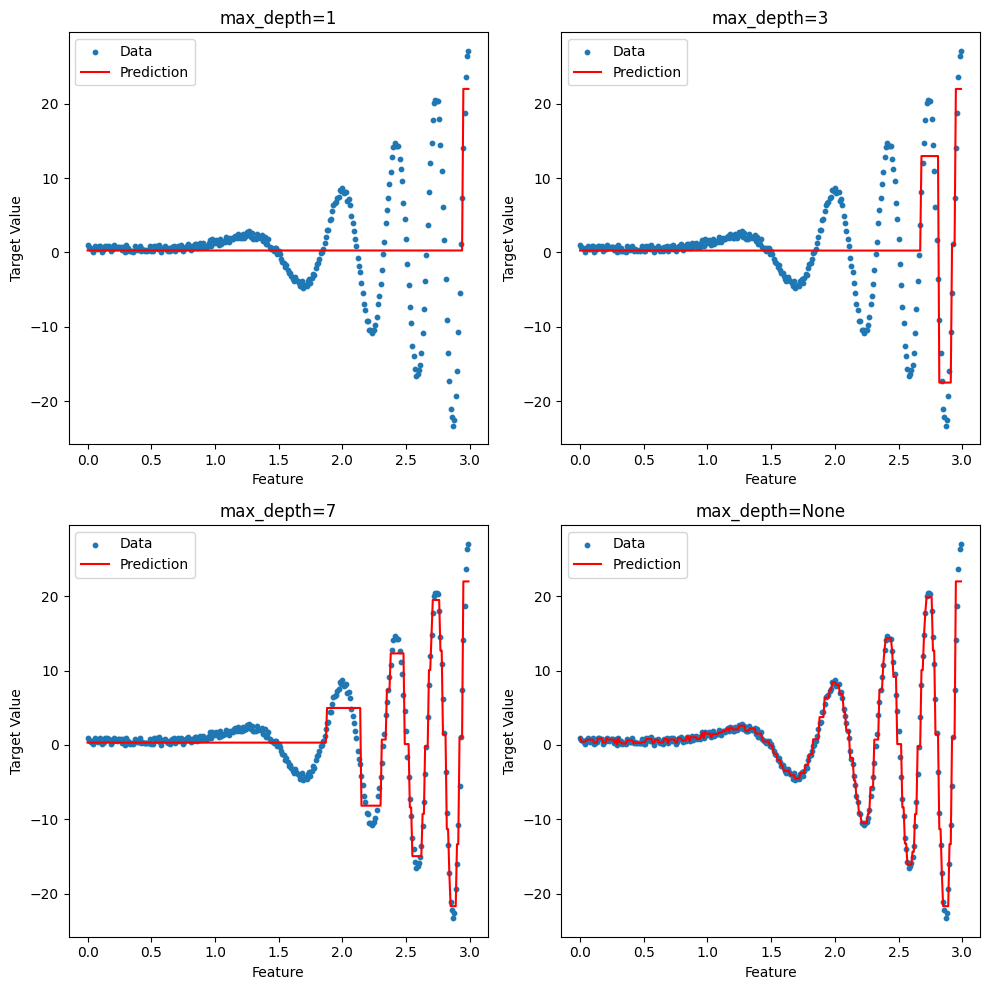

In [42]:
from decision_tree.decision_tree import RegressionDecisionTree
x = x.reshape(-1, 1)  
depths = [1, 3, 7, None] 
plt.figure(figsize=(10, 10))
for i, max_depth in enumerate(depths):
    plt.subplot(2, 2, i+1)
    tree = RegressionDecisionTree(max_depth=max_depth)
    tree.fit(x, y)
    y_pred = tree.predict(x)

    plt.scatter(x, y, s=10, label='Data')
    plt.plot(x, y_pred, color='red', label='Prediction')
    plt.xlabel('Feature')
    plt.ylabel('Target Value')
    plt.title(f'max_depth={max_depth}')
    plt.legend()

plt.tight_layout()
plt.show()

Если параметр глубины маленький, то значения очень плохо приближаются алгоритмом. В данном примере(на первом рисунке) только 1 разделение. Дерево недообучено. С увеличением глубины паттерны в данных находятся всё лучше и лучше. При этом при бесконечном числе ступенек можно уже говорить о переобучении.

(4 балла) Протестируйте различные реализации `random_forest` на `fetch_covtype` датасете (можно загрузить с помощью `sklearn.datasets.fetch_covtype`). Возможно, поможет ноутбук с семинара `ensembles_seminar.ipynb`. Для честного сравнения старайтесь использовать похожий набор гиперпараметров.
- ваша реализация (import `RandomForestClassifier as MyRandomForestClassifier` ниже)
- sklearn https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- lightgbm https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMModel.html см. параметр `boosting_type`
- xgboost https://xgboost.readthedocs.io/en/stable/tutorials/rf.html

    Что нужно сделать: 
- Разбейте данные на train и test. 
- Оцените качество алгоритмов по метрике (balanced_accuracy_score)[https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html]
- Оцените время работы `train` и `predict`
- Сделайте выводы

In [2]:
from random_forest.random_forest import RandomForestClassifier as MyRandomForestClassifier

In [3]:
from sklearn.datasets import fetch_covtype
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb
import pandas as pd
import time
import optuna

c:\Users\Лиана\OneDrive\Desktop\MSU\Machine-learning-1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
cov_type = fetch_covtype()
x, y = cov_type.data, cov_type.target - 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time_train = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time_train

    start_time_predict = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time_predict

    accuracy = balanced_accuracy_score(y_test, y_pred)

    return accuracy, train_time, predict_time

In [6]:
def times(study):
    train_times = [trial.user_attrs["train_time"] for trial in study.trials]
    predict_times = [trial.user_attrs["predict_time"] for trial in study.trials]

    avg_train_time = np.mean(train_times)
    avg_predict_time = np.mean(predict_times)

    print(f" Average Train Time: {avg_train_time} seconds")
    print(f" Average Predict Time: {avg_predict_time} seconds")

### SCLEARN

In [5]:
def objective_sklearn(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 5, 25)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1,  
    )

    accuracy, train_time, predict_time = evaluate_model(model, x_train, y_train, x_test, y_test)

    trial.set_user_attr("train_time", train_time)
    trial.set_user_attr("predict_time", predict_time)

    return accuracy

In [6]:
import optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective_sklearn, n_trials=20, n_jobs=-1)

c:\Users\Лиана\OneDrive\Desktop\MSU\Machine-learning-1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-03-17 12:24:32,820] A new study created in memory with name: no-name-a94decaf-b1c5-4557-94dc-3a382f6cace2
[I 2025-03-17 12:30:34,054] Trial 0 finished with value: 0.7979850058770125 and parameters: {'n_estimators': 41, 'max_depth': 20}. Best is trial 0 with value: 0.7979850058770125.
[I 2025-03-17 12:32:53,039] Trial 9 finished with value: 0.7183610712114766 and parameters: {'n_estimators': 52, 'max_depth': 16}. Best is trial 0 with value: 0.7979850058770125.
[I 2025-03-17 12:33:39,599] Trial 6 finished with value: 0.7630360318348771 and parameters: {'n_estimators': 68, 'max_depth': 18}. Best is trial 0 with value: 0.7979850058770125.
[I 2025-03-17 12:35:06,284] Trial 10 finished with value: 0.78302

In [9]:
times(study)

 Average Train Time: 540.6162215352058 seconds
 Average Predict Time: 37.26177237033844 seconds


### LGBM

In [12]:
def objective_lgbm(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 5, 25)

    model = lgb.LGBMClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1,
        boosting_type='rf',  
        bagging_fraction=0.8,  
        bagging_freq=1,
        feature_fraction=0.8
    )
    accuracy, train_time, predict_time = evaluate_model(model, x_train, y_train, x_test, y_test)
    trial.set_user_attr("train_time", train_time)
    trial.set_user_attr("predict_time", predict_time)

    return accuracy

In [13]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_lgbm, n_trials=20, n_jobs=-1)

[I 2025-03-17 12:48:31,039] A new study created in memory with name: no-name-f3a74059-59da-4bda-832a-d6880d22e10b
c:\Users\Лиана\OneDrive\Desktop\MSU\Machine-learning-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-03-17 12:49:16,724] Trial 3 finished with value: 0.7456827095235695 and parameters: {'n_estimators': 25, 'max_depth': 24}. Best is trial 3 with value: 0.7456827095235695.
c:\Users\Лиана\OneDrive\Desktop\MSU\Machine-learning-1\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-03-17 12:49:44,974] Trial 1 finished with value: 0.7471187874283409 and parameters: {'n_estimators': 43, 'max_depth': 13}. Best is trial 1 with value: 0.7471187874283409.
c:\Users\Лиана\OneDrive\Desktop\MSU\Machine-learning-1\.venv\Lib\site-

In [14]:
times(study)

 Average Train Time: 138.04528245925903 seconds
 Average Predict Time: 1.2665772795677186 seconds


### XGBOOST

In [12]:
def objective_xgboost(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 5, 25)

    model = xgb.XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=42,
        n_jobs=-1,
        tree_method='hist',
        objective='multi:softmax',
        num_class=7,
        enable_categorical=False,
        use_label_encoder=False
    )
    accuracy, train_time, predict_time = evaluate_model(model, x_train, y_train, x_test, y_test)
    trial.set_user_attr("train_time", train_time)
    trial.set_user_attr("predict_time", predict_time)
    return accuracy

In [13]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_xgboost, n_trials=20, n_jobs=-1)

[I 2025-03-17 12:56:13,087] A new study created in memory with name: no-name-7739494f-1250-42ee-bc48-d57c4b912458
[I 2025-03-17 12:58:31,739] Trial 0 finished with value: 0.8575383314412918 and parameters: {'n_estimators': 10, 'max_depth': 13}. Best is trial 0 with value: 0.8575383314412918.
[I 2025-03-17 13:00:50,923] Trial 5 finished with value: 0.8291265930205016 and parameters: {'n_estimators': 50, 'max_depth': 8}. Best is trial 0 with value: 0.8575383314412918.
[I 2025-03-17 13:01:28,562] Trial 8 finished with value: 0.9259952811535851 and parameters: {'n_estimators': 21, 'max_depth': 18}. Best is trial 8 with value: 0.9259952811535851.
[I 2025-03-17 13:01:46,618] Trial 11 finished with value: 0.9327015186397489 and parameters: {'n_estimators': 20, 'max_depth': 21}. Best is trial 11 with value: 0.9327015186397489.
[I 2025-03-17 13:03:26,863] Trial 15 finished with value: 0.9024797297721145 and parameters: {'n_estimators': 18, 'max_depth': 15}. Best is trial 11 with value: 0.932701

In [14]:
times(study)

 Average Train Time: 610.8319552302361 seconds
 Average Predict Time: 1.4220125913619994 seconds


### MYFOREST

In [7]:
def objective_myrf(trial):
    n_estimators = trial.suggest_int("n_estimators", 10, 200)
    max_depth = trial.suggest_int("max_depth", 5, 25)  

    model = MyRandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,  
        random_state=42
    )

    accuracy, train_time, predict_time = evaluate_model(model, x_train, y_train, x_test, y_test)
    trial.set_user_attr("train_time", train_time)
    trial.set_user_attr("predict_time", predict_time)

    return accuracy

In [8]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_myrf, n_trials=20, n_jobs=-1)

[I 2025-03-17 14:57:24,931] A new study created in memory with name: no-name-e069a56a-554b-486c-bd94-334a8c625702
[I 2025-03-17 15:01:51,860] Trial 0 finished with value: 0.4599581276127487 and parameters: {'n_estimators': 23, 'max_depth': 6}. Best is trial 0 with value: 0.4599581276127487.
[I 2025-03-17 15:03:21,171] Trial 7 finished with value: 0.547126229160665 and parameters: {'n_estimators': 25, 'max_depth': 8}. Best is trial 7 with value: 0.547126229160665.
[I 2025-03-17 15:03:48,608] Trial 11 finished with value: 0.6923655162745447 and parameters: {'n_estimators': 16, 'max_depth': 14}. Best is trial 11 with value: 0.6923655162745447.
[I 2025-03-17 15:08:19,048] Trial 12 finished with value: 0.6357870013487091 and parameters: {'n_estimators': 22, 'max_depth': 11}. Best is trial 11 with value: 0.6923655162745447.
[I 2025-03-17 15:12:18,585] Trial 8 finished with value: 0.5656664141610592 and parameters: {'n_estimators': 56, 'max_depth': 9}. Best is trial 11 with value: 0.692365516

In [9]:
times(study)

 Average Train Time: 1789.0373927116393 seconds
 Average Predict Time: 32.19170153141022 seconds


### Выводы

Использовались общие параметры  
`n_estimators = trial.suggest_int("n_estimators", 10, 200)`
`max_depth = trial.suggest_int("max_depth", 5, 25) `

Лучшее качество достигнуто с помощью: xgboost

Качество: 0.9459270757689024

Лучшее среднее время обучения: 138.04528245925903 seconds lgbm

Лучшее среднее время предсказания: 1.2665772795677186 seconds lgbm